In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import openturns as ot
import seaborn as sns
sns.set(style="darkgrid")

    time  conversion  cummulative_conversion
0    0.0         5.0                     5.0
1    1.0         5.0                    10.0
2    2.0         5.0                    15.0
3    3.0         5.0                    20.0
4    4.0         5.0                    25.0
5    5.0         5.0                    30.0
6    6.0         5.0                    35.0
7    7.0         5.0                    40.0
8    8.0         5.0                    45.0
9    9.0         5.0                    50.0
10  10.0         5.0                    55.0
11  11.0         5.0                    60.0
12  12.0         5.0                    65.0
13  13.0         5.0                    70.0
14  14.0         5.0                    75.0
15  15.0         5.0                    80.0
16  16.0         5.0                    85.0
17  17.0         5.0                    90.0
18  18.0         5.0                    95.0
19  19.0         5.0                   100.0
20  20.0         5.0                   105.0
21  21.0  

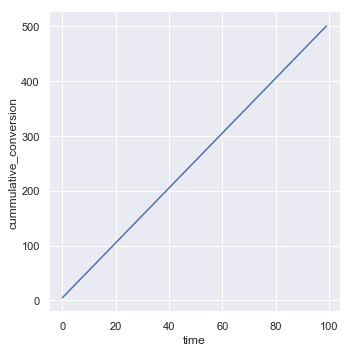

In [2]:
visitors1 = 100
conversion1 = 0.05

timesteps = 100

def simple(visitors, conversion, timesteps):
    results = np.zeros((timesteps, 3))
    results[:, 0] = np.arange(0, timesteps)
    for i in range(0, timesteps):
        results[i, 1] = np.round(visitors * conversion)
        if i > 0:
            results[i, 2] = results[i-1, 2] + results[i, 1]
        else:
            results[i, 2] = results[i, 1]
    return pd.DataFrame(results, columns=["time", "conversion", "cummulative_conversion"])

results1 = simple(visitors1, conversion1, timesteps)
print(results1)
sns.relplot(x="time", y="cummulative_conversion", kind="line", data=results1)


    time  conversion  cummulative_conversion
0    0.0         3.0                     3.0
1    1.0         4.0                     7.0
2    2.0         8.0                    15.0
3    3.0         6.0                    21.0
4    4.0         9.0                    30.0
5    5.0         6.0                    36.0
6    6.0         7.0                    43.0
7    7.0         0.0                    43.0
8    8.0         2.0                    45.0
9    9.0         9.0                    54.0
10  10.0         5.0                    59.0
11  11.0         7.0                    66.0
12  12.0         6.0                    72.0
13  13.0         4.0                    76.0
14  14.0         5.0                    81.0
15  15.0         4.0                    85.0
16  16.0         4.0                    89.0
17  17.0         4.0                    93.0
18  18.0         4.0                    97.0
19  19.0         8.0                   105.0
20  20.0         1.0                   106.0
21  21.0  

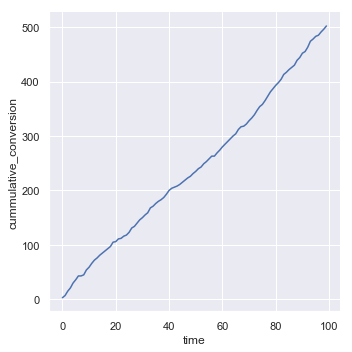

In [3]:
timesteps = 100

# Set random seed
np.random.seed(0)  # this is not really needed here, just reference
ot.RandomGenerator.SetSeed(0)  # needed since we use OpenTURNS for the distribution

def probabilistic(visitors, conversion, timesteps):
    results = np.zeros((timesteps, 3))
    results[:, 0] = np.arange(0, timesteps)
    distribution = ot.Bernoulli(conversion)
    for i in range(0, timesteps):
        results[i, 1] = np.sum(distribution.getSample(np.int(visitors)))
        if i > 0:
            results[i, 2] = results[i-1, 2] + results[i, 1]
        else:
            results[i, 2] = results[i, 1]
    return pd.DataFrame(results, columns=["time", "conversion", "cummulative_conversion"])

results2 = probabilistic(visitors1, conversion1, timesteps)
print(results2)
sns.relplot(x="time", y="cummulative_conversion", kind="line", data=results2)


Mean: 492.9, Std: 17.1


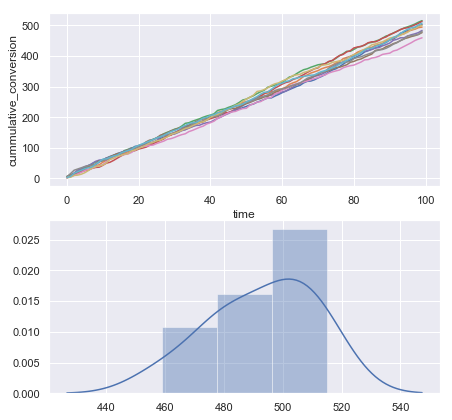

In [4]:
ot.RandomGenerator.SetSeed(0)

repeats = 10
f, axes = plt.subplots(2, 1, figsize=(7, 7))
finals = np.zeros(repeats)

for i in range(repeats):
    res = probabilistic(visitors1, conversion1, timesteps)
    finals[i] = res['cummulative_conversion'].tail(1)
    sns.lineplot(x="time", y="cummulative_conversion", data=res, ax=axes[0])

sns.distplot(finals, ax=axes[1]);
print("Mean: {0}, Std: {1:.4}".format(np.mean(finals), np.std(finals)))

Simulation: 0
Simulation: 100
Simulation: 200
Simulation: 300
Simulation: 400
Simulation: 500
Simulation: 600
Simulation: 700
Simulation: 800
Simulation: 900
Mean: 500.543, Std: 21.94


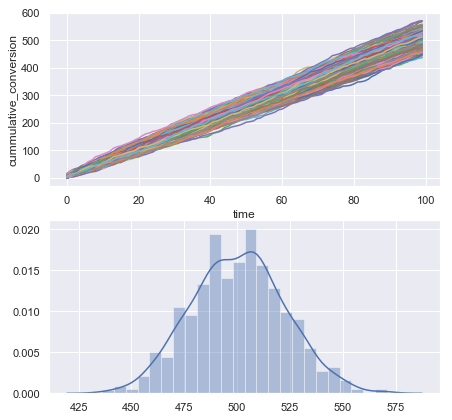

In [5]:
ot.RandomGenerator.SetSeed(0)

repeats = 1000
f, axes = plt.subplots(2, 1, figsize=(7, 7))
finals = np.zeros(repeats)

for i in range(repeats):
    if i % 100 == 0:
        # To show progress
        print("Simulation: {}".format(i))
    res = probabilistic(visitors1, conversion1, timesteps)
    finals[i] = res['cummulative_conversion'].tail(1)
    sns.lineplot(x="time", y="cummulative_conversion", data=res, ax=axes[0])

sns.distplot(finals, ax=axes[1]);

print("Mean: {0}, Std: {1:.4}".format(np.mean(finals), np.std(finals)))

    time  visitors  conversion  cummulative_conversion
0    0.0      75.0         2.0                     2.0
1    1.0     111.0         4.0                     6.0
2    2.0      91.0         5.0                    11.0
3    3.0     125.0         7.0                    18.0
4    4.0      95.0        11.0                    29.0
5    5.0     106.0         6.0                    35.0
6    6.0     137.0         5.0                    40.0
7    7.0      92.0         1.0                    41.0
8    8.0     101.0         9.0                    50.0
9    9.0      77.0         3.0                    53.0
10  10.0      94.0         2.0                    55.0
11  11.0     115.0         5.0                    60.0
12  12.0      87.0         6.0                    66.0
13  13.0      91.0         1.0                    67.0
14  14.0     123.0         6.0                    73.0
15  15.0      89.0         3.0                    76.0
16  16.0      95.0         3.0                    79.0
17  17.0  

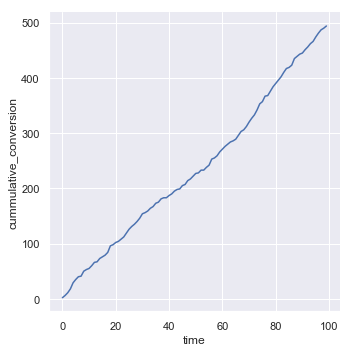

In [6]:
ot.RandomGenerator.SetSeed(0)

visitors2 = ot.Normal(visitors1, 20)
conversion2 = ot.Normal(conversion1, 0.01)

def probabilistic_dist(visitors, conversion, timesteps):
    results = np.zeros((timesteps, 4))
    results[:, 0] = np.arange(0, timesteps)
    for i in range(0, timesteps):
        conversion_now = ot.Bernoulli(conversion.getSample(1)[0][0])
        visitors_now = np.int(np.round(visitors.getSample(1)[0][0]))
        results[i, 1] = visitors_now
        results[i, 2] = np.sum(conversion_now.getSample(visitors_now))
        if i > 0:
            results[i, 3] = results[i-1, 3] + results[i, 2]
        else:
            results[i, 3] = results[i, 2]
    return pd.DataFrame(results, columns=["time", "visitors", "conversion", "cummulative_conversion"])


results_mc1 = probabilistic_dist(visitors2, conversion2, timesteps)
print(results_mc1)
sns.relplot(x="time", y="cummulative_conversion", kind="line", data=results_mc1)

Simulation: 0
Simulation: 100
Simulation: 200
Simulation: 300
Simulation: 400
Simulation: 500
Simulation: 600
Simulation: 700
Simulation: 800
Simulation: 900
Mean: 500.354, Std: 27.08


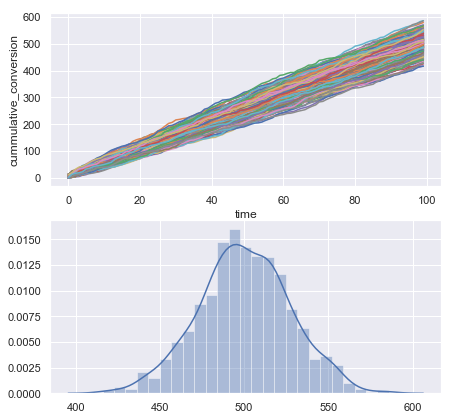

In [7]:
ot.RandomGenerator.SetSeed(0)

repeats = 1000
f, axes = plt.subplots(2, 1, figsize=(7, 7))
v = visitors2.getSample(repeats)
c = conversion2.getSample(repeats)
finals = np.zeros(repeats)

for i in range(repeats):
    if i % 100 == 0:
        # To show progress
        print("Simulation: {}".format(i))
    res = probabilistic_dist(visitors2, conversion2, timesteps)
    finals[i] = res['cummulative_conversion'].tail(1)
    sns.lineplot(x="time", y="cummulative_conversion", data=res, ax=axes[0])

sns.distplot(finals, ax=axes[1]);

print("Mean: {0}, Std: {1:.4}".format(np.mean(finals), np.std(finals)))
